# Machine Learning Prediction

### A classification example using the "Give me some Credit" Kaggle project

[LINK TO KAGGLE](https://www.kaggle.com/c/GiveMeSomeCredit)

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# paths to data
path = 'cs-training.csv'
#remote_path = "https://srv-file6.gofile.io/download/ioGcrF/cs-training.csv"

## Taking a first look at the data

In [5]:
# There a column "Unnamed: 0" with a auto-incrementing integer - doesn't seem necessary, let's remove it
df = pd.read_csv(path)
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df = df.drop(labels=['Unnamed: 0'], axis=1)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Pre-processing

In [90]:
"""
    Pre-processing is the place for:
        - cleaning data
        - feature engineering

    This is the brain of the model
"""

print('pre-processing')
# I've included 2 simple new features. To improve the accuracy of the model, we'll need more than this !
# computing expenses
df['monthly-expenses'] = df['MonthlyIncome'] * df['DebtRatio']
# cash out
df['cash-out'] = df['MonthlyIncome'] - df['monthly-expenses']
# There should be no `None` values after this step
df = df.fillna(0)    

""" 
    1. Scale features - necessary step for some models
    2. Extract the X & y matrices
"""
print('scaling features... ')
# Extract arrays
y = df['SeriousDlqin2yrs'].values
X = df.drop('SeriousDlqin2yrs', axis='columns').values
feature_names = df.drop('SeriousDlqin2yrs', axis='columns').columns.tolist()

# Scale
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)



pre-processing
scaling features... 


## Splitting the data between Training & Test data sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Fitting the model and computing the accuracy

In [92]:

def plot_roc(y_test, proba):
    fpr, tpr, thresholds = roc_curve(y_test, proba)
    plt.plot([0, 1], [0, 1], linestyle=':')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()
    
    
def train(estimator):
    print('training model - with training set')
    estimator.fit(X_train, y_train)

    print('predicting')
    y_pred = estimator.predict(X_test)
    proba = estimator.predict_proba(X_test)[:,1]
    plot_roc(y_test, proba)
    
    score = metrics.roc_auc_score(y_test, y_pred)
    print(f'AUC score: {score}')


## Results with a Logistic Regression

training model - with training set
predicting


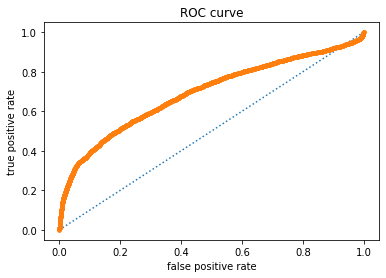

AUC score: 0.5194227838183048


In [93]:
estimator = linear_model.LogisticRegression(max_iter=50)
train(estimator)    

## Results with a Simple Random Forest

training model - with training set
predicting


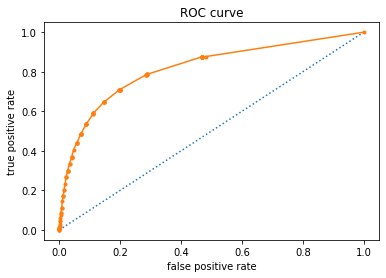

AUC score: 0.5792571727890925


In [94]:
estimator = ensemble.RandomForestClassifier(n_estimators=30)
train(estimator)    